In [1]:
import numpy as np
import scipy as sc
import scipy.optimize as opt
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.random import randint
import gc

In [2]:
runs = 100

In [3]:
def lognorm(x,mu,sigma):
    sigma = float(sigma)
    mu = float(mu)
    x = float(x)
    exp = -((np.log(x)-mu)**2/(2*sigma**2))
    front = 1/(x*sigma*np.sqrt(2*np.pi))
    return front*np.exp(exp)

#fast_leave = 1193. #Minimum days to leave dust cloud
x_list = np.linspace(0.01,1500,1500)

mean = 140.
sigma = 0.8 
mu = np.log(mean) - 1/2.*sigma
log = []
for i in range(len(x_list)):
    log.append(lognorm(x_list[i],mu,sigma))
        
print np.nansum(log)*1500/1500.

0.9990749458593796


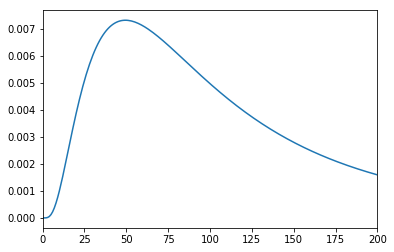

In [4]:
plt.figure()
plt.plot(x_list,log)
plt.xlim([0,200])
plt.show()

In [7]:
x = 6.
if x == 4:
    print '1'
elif x < 6:
    print '2'
else:
    print 'else'

else


In [6]:
data = np.loadtxt('NOVEMBER/Kelly-NGC3783K')
data1 = np.loadtxt('NOVEMBER/NOV-NGC3783-K')
error = np.loadtxt('NOVEMBER/NGC3783_NOISE_K.txt')

[57516. 57523. 57530. 57547. 57554. 57562. 57569. 57583. 57598. 57693.
 57701. 57711. 57719. 57726. 57733. 57741. 57749. 57757. 57764. 57772.
 57786. 57794. 57801. 57809. 57817. 57864. 57878. 57887. 57894. 57903.
 57910. 57918. 57925. 57933. 57942. 57942. 57949. 57956. 58055. 58062.
 58070. 58079. 58086. 58094.]
[6.53724662e-15 6.68657641e-15 6.71527344e-15 6.60099894e-15
 6.37713900e-15 6.66855803e-15 6.67181077e-15 6.40972481e-15
 6.56864377e-15 6.57594350e-15 6.74248785e-15 6.98912737e-15
 7.06941435e-15 7.16508274e-15 7.45461953e-15 7.60092634e-15
 7.60039417e-15            nan 8.05099584e-15 7.98610860e-15
 8.21301406e-15 8.22193811e-15 8.25153761e-15            nan
 8.38115563e-15            nan 9.19988661e-15 9.20615762e-15
 9.29548448e-15 9.44518380e-15 9.50857590e-15 9.73722913e-15
 9.80940383e-15 9.78447827e-15            nan            nan
 9.85013975e-15 9.76320384e-15 9.45886211e-15 9.26290708e-15
 9.16831540e-15 9.11523113e-15 9.00052668e-15 9.08440971e-15]
[7.0, 7.0, 17.

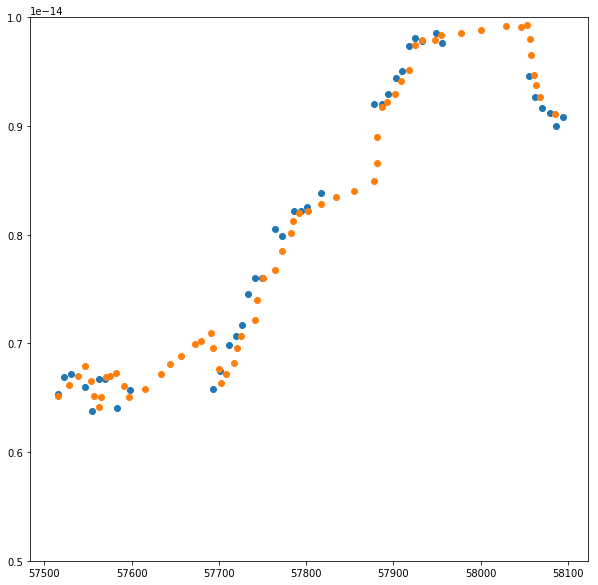

In [23]:
print data1[:,0]
print data1[:,1]
date = []
dif = []
rel = []
for i in range(len(data1[:,0])-1):
    date.append(data1[i+1,0]-data1[i,0])
    dif.append((data1[i+1,1]-data1[i,1])/data1[i,1])
    rel.append(abs(dif[i]/date[i]))
print date
print np.nanmax(rel)

plt.figure(figsize=(10,10))
plt.scatter(data1[:,0],data1[:,1])
plt.scatter(data[:,0],data[:,1])
plt.ylim([5e-15,1e-14])
plt.show()

In [16]:
print log[:]

[3.60578249524778e-09, 2.494163143481343e-07, 2.0993007635430814e-06, 8.143702850775949e-06, 2.1321348843556626e-05, 4.418322504825418e-05, 7.856112677337945e-05, 0.00012551357797410925, 0.0001854095869405209, 0.000258063039049791, 0.0003428725694082325, 0.0004389468050445103, 0.0005452081091533199, 0.0006604743660350463, 0.0007835210965323723, 0.0009131270988120882, 0.001048106841040773, 0.0011873324945296938, 0.0013297480389607619, 0.001474377413064229, 0.0016203282741411, 0.0017667925838536402, 0.0019130449556452442, 0.0020584394742365385, 0.002202405521015744, 0.002344443001972118, 0.002484117269221179, 0.0026210539464685766, 0.002754933807497315, 0.0028854878105666927, 0.003012492357023617, 0.0031357648167415, 0.003255159344114632, 0.003370562994618662, 0.003481892142145991, 0.0035890891904744237, 0.003692119567589519, 0.0037909689885912414, 0.003885640971142712, 0.003976154586535957, 0.004062542429208107, 0.004144848787753853, 0.004223128001005296, 0.0042974429834829, 0.004367863

In [ ]:
cont_days = np.arange(min(data[:,0])-600.,max(data[:,0]),1)
print np.shape(cont_days)
cont = np.zeros((len(cont_days),3))
cont[:,0] = cont_days
cont[:,1] = np.nanmean(data[:,1])
data_comp = np.zeros((len(data[:,1]),3))
data_comp[:,0] = data[:,0]
data_comp[:,1] = data[:,1]
data_comp[:,2] = 0

chi1 = 1e10000
for i in range(runs):
    print i
    for j in range(len(cont_days)):
        #print i, j/float(len(cont_days))
        data_comp[:,2] = 0
        #place1 = randint(0,len(cont_days))
        #place2 = randint(0,len(cont_days))
        #place3 = randint(0,len(cont_days))
        #place4 = randint(0,len(cont_days))
        #place5 = randint(0,len(cont_days))
        change = (-1)**randint(0,2)*cont[j,1]*random.random()*0.05
        #change1 = (-1)**randint(0,2)*cont[place1,1]*random.random()*0.05
        #change2 = (-1)**randint(0,2)*cont[place2,1]*random.random()*0.05
        #change3 = (-1)**randint(0,2)*cont[place3,1]*random.random()*0.05
        #change4 = (-1)**randint(0,2)*cont[place4,1]*random.random()*0.05
        #change5 = (-1)**randint(0,2)*cont[place5,1]*random.random()*0.05
        cont[j,1] += change
        #cont[place1,1] += change1
        #cont[place2,1] += change2
        #cont[place3,1] += change3
        #cont[place4,1] += change4
        #cont[place5,1] += change5        
        h = 0
        #print 'j = ', j
        for h in range(len(data_comp[:,0])):
            for k in range(len(cont_days)):
                if cont_days[k] < data_comp[h,0]:
                    data_comp[h,2] += cont[k,1]*log[abs(int((cont[k,0]-data_comp[h,0])))] #int((cont[k,0]-data_comp[h,0])/10.)
                    #print 'yes'
            #print 'k = ', k
        #print data_comp[:,2]
        chi2 = np.nansum((data_comp[:,1] - data_comp[:,2])**2)
        #print chi2, chi1
        if chi2 >= chi1:
            #print 'YES'
            cont[j,1] -= change
            #cont[place1,1] -= change1
            #cont[place2,1] -= change2
            #cont[place3,1] -= change3
            #cont[place4,1] -= change4
            #cont[place5,1] -= change5
        elif chi2 < chi1:
            #print chi2 - chi1
            chi1 = chi2
        gc.collect()
    gc.collect()